# Import libraries

In [117]:
import pandas as pd
import numpy as np
import scipy.stats as spystats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import resample
from math import sqrt
from sklearn.svm import SVC
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [118]:
shop_df= pd.read_csv("NewDataset.csv")  #Read input file

In [119]:
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425997 entries, 0 to 425996
Data columns (total 16 columns):
Unnamed: 0      425997 non-null int64
UserID          425997 non-null object
url             425997 non-null object
PageDuration    425997 non-null float64
BounceRate      425997 non-null float64
ExitRate        425997 non-null float64
PageValue       425997 non-null float64
SpecialDay      425997 non-null float64
Month           425997 non-null object
OS              425997 non-null int64
Browser         425997 non-null int64
Region          425997 non-null int64
TrafficType     425997 non-null int64
VisitorType     425997 non-null object
Weekend         425997 non-null bool
Purchased       425997 non-null bool
dtypes: bool(2), float64(5), int64(5), object(4)
memory usage: 46.3+ MB


# Create new feature "ProductCode" from existing "URL" 

In [120]:
site="www.myecommerce.com"
admin_related=["info","admin","Home"]
products_related=[]

In [121]:
def CreateProductCode(url):
    data= url.split("/")
    if(data[0]!= site):
        print(data[0])
        return "Invalid url"
    elif(data[1] in admin_related):
        return "admin"
    else:
        return data[1]+data[2]

In [122]:
shop_df["productCode"]= shop_df["url"].apply(CreateProductCode)

www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info


www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info
www.myecommerce.com.info


In [123]:
shop_df.head(5)

,Unnamed: 0,UserID,url,PageDuration,BounceRate,ExitRate,PageValue,SpecialDay,Month,OS,Browser,Region,TrafficType,VisitorType,Weekend,Purchased,productCode
0,0,User0,www.myecommerce.com/Furnitures/03,0.000000,0.20,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,Furnitures03
1,0,User1,www.myecommerce.com/MobileCameraAccesories/03,80.000000,0.00,0.120000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,MobileCameraAccesories03
2,1,User1,www.myecommerce.com/MobileCameraAccesories/01,48.000000,0.00,0.080000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,MobileCameraAccesories01
3,0,User2,www.myecommerce.com/Furnitures/08,0.000000,0.20,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,Furnitures08
4,0,User3,www.myecommerce.com/Furnitures/10,3.333333,0.06,0.186667,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,Furnitures10


In [124]:
shop_df.productCode.unique()

array(['Furnitures03', 'MobileCameraAccesories03',
       'MobileCameraAccesories01', 'Furnitures08', 'Furnitures10',
       'Furnitures07', 'Furnitures06', 'Furnitures09', 'Furnitures04',
       'Kids08', 'Kids09', 'Kids10', 'Kids01', 'Kids07', 'Kids05',
       'Kids06', 'MobileCameraAccesories06', 'admin', 'HomeAppliances05',
       'HomeAppliances04', 'Kids04', 'Electronics01', 'Electronics05',
       'Electronics07', 'HomeAppliances01', 'HomeAppliances02',
       'HomeAppliances08', 'HomeAppliances10', 'HomeAppliances06',
       'HomeAppliances03', 'HomeAppliances07', 'HomeAppliances09',
       'Kids03', 'Furnitures02', 'Furnitures05',
       'MobileCameraAccesories05', 'Kids02', 'Electronics09',
       'Electronics04', 'Electronics06', 'Electronics02', 'Furnitures01',
       'MobileCameraAccesories10', 'MobileCameraAccesories07',
       'Electronics10', 'Electronics08', 'Electronics03',
       'MobileCameraAccesories04', 'MobileCameraAccesories08',
       'MobileCameraAccesories09

# To check details about the purchased and non purchased ratio

Number of Purchases 9254 and percent is 2.1723157674819307: 
Number of non Purchases 416743 and percent is 97.82768423251807: 


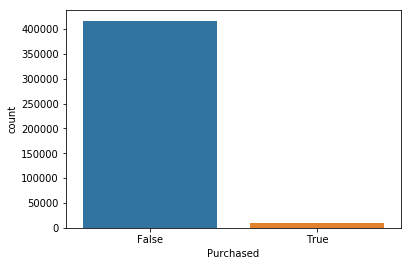

In [125]:
ax= sns.countplot(shop_df["Purchased"], label="Count")
NotPurchased,Purchased = shop_df["Purchased"].value_counts()
Purper= (Purchased/len(shop_df["Purchased"])*100)
nonPurper= (NotPurchased/len(shop_df["Purchased"])*100)
print('Number of Purchases {a} and percent is {b}: '.format(a= Purchased, b= Purper))
print('Number of non Purchases {a} and percent is {b}: '.format(a= NotPurchased, b=nonPurper))

# To check details of different products quanity sold

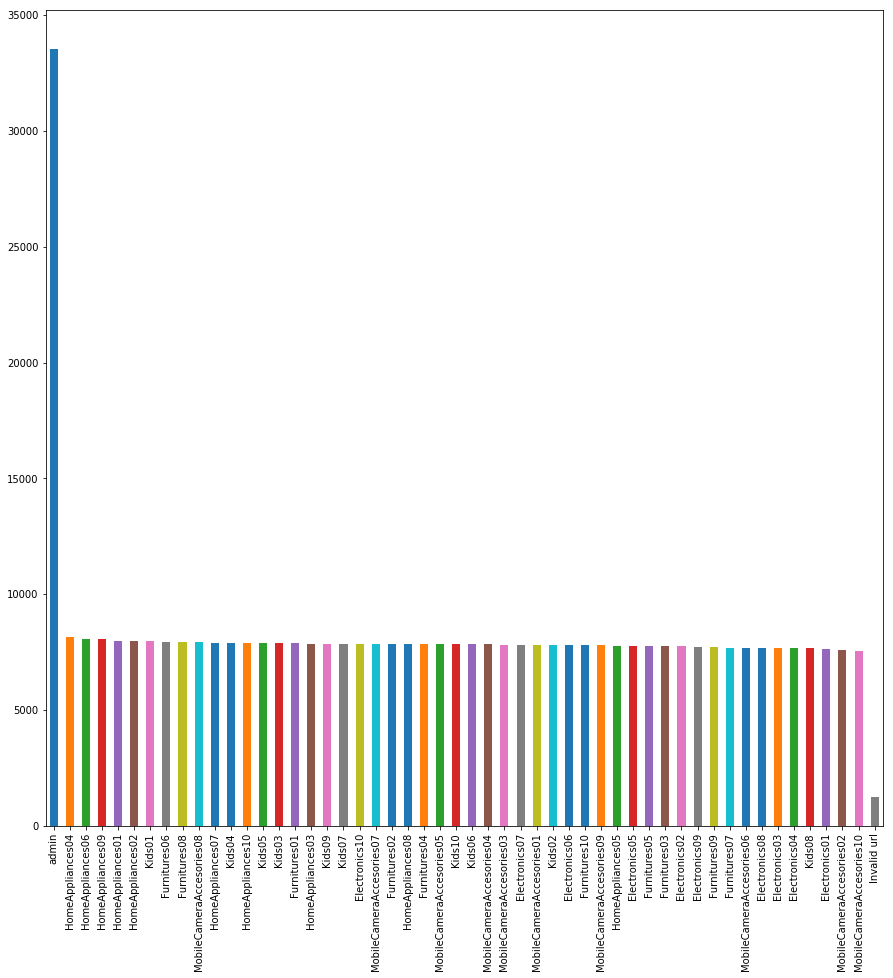

In [126]:
shop_df["productCode"].value_counts().plot.bar(figsize= (15,15))

Observed admin urls count double than other products and url also has some invalid data.

In [127]:
shop_df.productCode.value_counts()

admin                       33526
HomeAppliances04             8147
HomeAppliances06             8069
HomeAppliances09             8053
HomeAppliances01             7979
HomeAppliances02             7978
Kids01                       7964
Furnitures06                 7950
Furnitures08                 7922
MobileCameraAccesories08     7921
HomeAppliances07             7905
Kids04                       7894
HomeAppliances10             7894
Kids05                       7892
Kids03                       7886
Furnitures01                 7874
HomeAppliances03             7867
Kids09                       7866
Kids07                       7866
Electronics10                7857
MobileCameraAccesories07     7848
Furnitures02                 7842
HomeAppliances08             7836
Furnitures04                 7835
MobileCameraAccesories05     7835
Kids10                       7834
Kids06                       7834
MobileCameraAccesories04     7828
MobileCameraAccesories03     7823
Electronics07 

In [128]:
inv= shop_df[shop_df["productCode"]=="Invalid url"]

In [129]:
inv["url"].unique()

array(['www.myecommerce.com.info/aboutus'], dtype=object)

It has only one invalid url with above string

# Drop unwanted columns

In [130]:
product_detail_df= shop_df.drop(columns=["UserID", "url","Unnamed: 0"]) 

In [131]:
product_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425997 entries, 0 to 425996
Data columns (total 14 columns):
PageDuration    425997 non-null float64
BounceRate      425997 non-null float64
ExitRate        425997 non-null float64
PageValue       425997 non-null float64
SpecialDay      425997 non-null float64
Month           425997 non-null object
OS              425997 non-null int64
Browser         425997 non-null int64
Region          425997 non-null int64
TrafficType     425997 non-null int64
VisitorType     425997 non-null object
Weekend         425997 non-null bool
Purchased       425997 non-null bool
productCode     425997 non-null object
dtypes: bool(2), float64(5), int64(4), object(3)
memory usage: 39.8+ MB


# Check for categorical columns

In [132]:
product_detail_df["SpecialDay"]=product_detail_df["SpecialDay"].astype('category')

In [133]:
product_detail_df["SpecialDay"].unique()

[0.0, 0.4, 0.8, 1.0, 0.2, 0.6]
Categories (6, float64): [0.0, 0.4, 0.8, 1.0, 0.2, 0.6]

In [134]:
months=[]
import calendar as cd
for a in cd.month_abbr:
    if(a!=""):        
        months.append(a)

In [135]:
product_detail_df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [136]:
product_detail_df["Month"]=product_detail_df["Month"].astype('category').cat.codes

In [137]:
product_detail_df["Month"].unique()

array([2, 5, 6, 8, 4, 3, 0, 7, 9, 1], dtype=int64)

In [138]:
product_detail_df["OS"]=product_detail_df["OS"].astype('category')

In [139]:
product_detail_df["OS"].unique()

[1, 2, 4, 3, 7, 6, 8, 5]
Categories (8, int64): [1, 2, 4, 3, 7, 6, 8, 5]

In [140]:
product_detail_df["Browser"]=product_detail_df["Browser"].astype('category')

In [141]:
product_detail_df["Browser"].unique()

[1, 2, 3, 4, 5, ..., 8, 9, 12, 13, 11]
Length: 13
Categories (13, int64): [1, 2, 3, 4, ..., 9, 12, 13, 11]

In [142]:
product_detail_df["Region"]=product_detail_df["Region"].astype('category').cat.codes

In [143]:
product_detail_df["Region"].unique()

array([0, 8, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [144]:
product_detail_df["TrafficType"]=product_detail_df["TrafficType"].astype('category').cat.codes

In [145]:
product_detail_df["TrafficType"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 17, 18,
       15, 16, 19], dtype=int64)

In [146]:
product_detail_df["VisitorType"]=product_detail_df["VisitorType"].astype('category').cat.codes

In [147]:
product_detail_df["VisitorType"].unique()

array([2, 0, 1], dtype=int64)

In [148]:
product_detail_df["Weekend"]=product_detail_df["Weekend"].astype('category').cat.codes

In [149]:
product_detail_df["Weekend"].unique()

array([0, 1], dtype=int64)

In [150]:
product_detail_df["Purchased"].unique()

array([False,  True])

In [151]:
product_detail_df["Purchased"]=product_detail_df["Purchased"].astype('category').cat.codes

# Check updated categories

In [152]:
product_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425997 entries, 0 to 425996
Data columns (total 14 columns):
PageDuration    425997 non-null float64
BounceRate      425997 non-null float64
ExitRate        425997 non-null float64
PageValue       425997 non-null float64
SpecialDay      425997 non-null category
Month           425997 non-null int8
OS              425997 non-null category
Browser         425997 non-null category
Region          425997 non-null int8
TrafficType     425997 non-null int8
VisitorType     425997 non-null int8
Weekend         425997 non-null int8
Purchased       425997 non-null int8
productCode     425997 non-null object
dtypes: category(3), float64(4), int8(6), object(1)
memory usage: 19.9+ MB


In [153]:
grouped_data=product_detail_df.groupby('Purchased')


# For each product create a dataframe and perform product level analysis

In [154]:
frames=[]
frames_index=[]

for a in product_detail_df["productCode"].unique():
    index_name= "PC_"+a+"_df"
    data=("PC_"+a+"_df")
    data= pd.DataFrame()
    data= product_detail_df[product_detail_df["productCode"]==a]
    frames_index.append(index_name)
    frames.append(data)
    
    
frameseriespd=pd.Series(frames, frames_index)


Pending: Create unique files for products

Analysis for product PC_Furnitures03_df


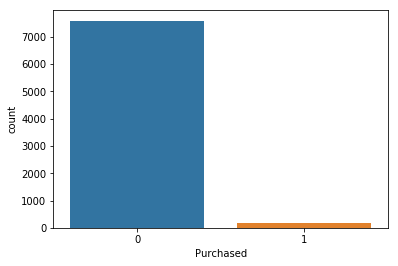

Number of Views:7768
Number of Purchases 182 and percent is 2.3429454170957773: 
Number of non Purchases 7586 and percent is 97.65705458290422: 
Analysis for product PC_MobileCameraAccesories03_df


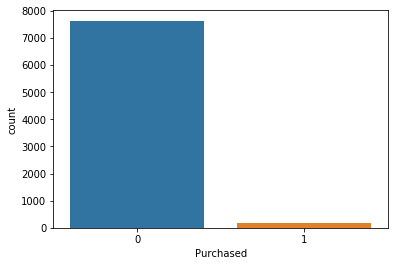

Number of Views:7823
Number of Purchases 188 and percent is 2.403170139332737: 
Number of non Purchases 7635 and percent is 97.59682986066727: 
Analysis for product PC_MobileCameraAccesories01_df


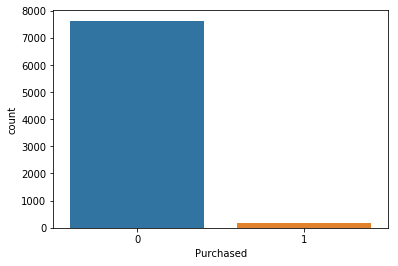

Number of Views:7807
Number of Purchases 181 and percent is 2.3184321762520814: 
Number of non Purchases 7626 and percent is 97.68156782374791: 
Analysis for product PC_Furnitures08_df


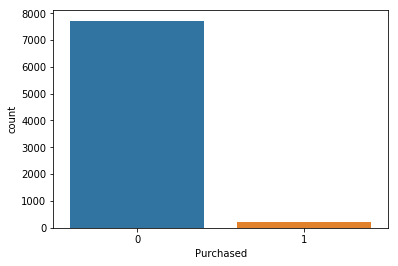

Number of Views:7922
Number of Purchases 203 and percent is 2.5624842211562737: 
Number of non Purchases 7719 and percent is 97.43751577884373: 
Analysis for product PC_Furnitures10_df


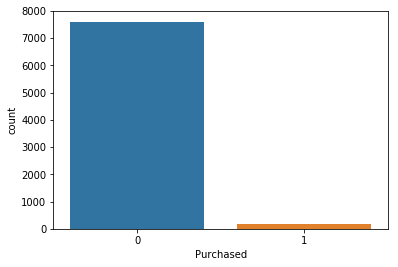

Number of Views:7790
Number of Purchases 186 and percent is 2.387676508344031: 
Number of non Purchases 7604 and percent is 97.61232349165597: 
Analysis for product PC_Furnitures07_df


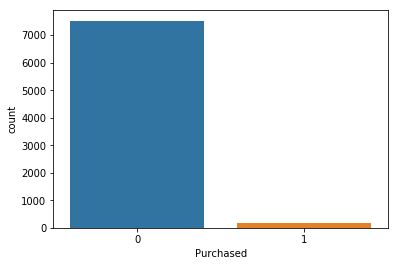

Number of Views:7694
Number of Purchases 170 and percent is 2.2095139069404732: 
Number of non Purchases 7524 and percent is 97.79048609305953: 
Analysis for product PC_Furnitures06_df


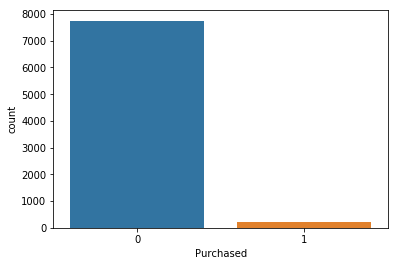

Number of Views:7950
Number of Purchases 201 and percent is 2.5283018867924527: 
Number of non Purchases 7749 and percent is 97.47169811320755: 
Analysis for product PC_Furnitures09_df


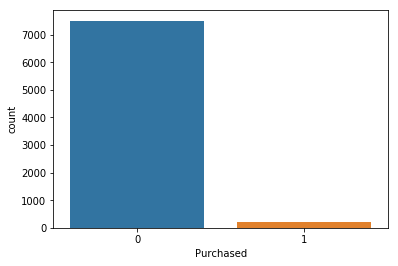

Number of Views:7706
Number of Purchases 199 and percent is 2.5824033220866855: 
Number of non Purchases 7507 and percent is 97.41759667791331: 
Analysis for product PC_Furnitures04_df


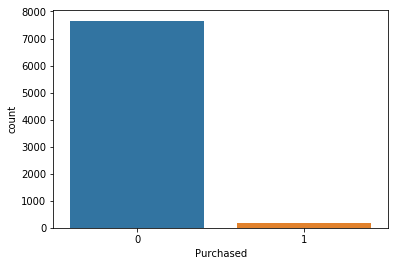

Number of Views:7835
Number of Purchases 176 and percent is 2.246330567964263: 
Number of non Purchases 7659 and percent is 97.75366943203574: 
Analysis for product PC_Kids08_df


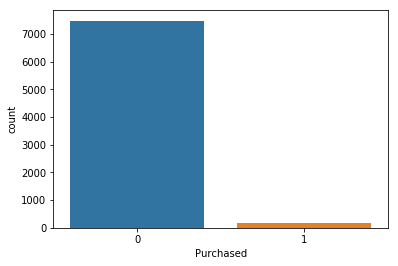

Number of Views:7663
Number of Purchases 182 and percent is 2.3750489364478664: 
Number of non Purchases 7481 and percent is 97.62495106355213: 
Analysis for product PC_Kids09_df


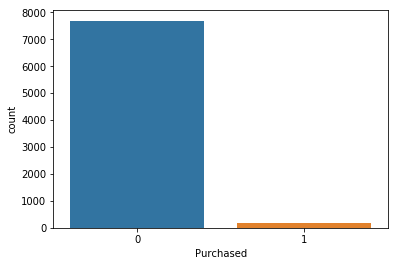

Number of Views:7866
Number of Purchases 176 and percent is 2.2374777523518943: 
Number of non Purchases 7690 and percent is 97.7625222476481: 
Analysis for product PC_Kids10_df


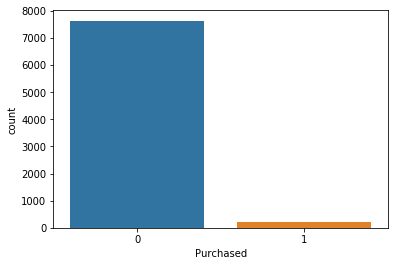

Number of Views:7834
Number of Purchases 199 and percent is 2.5402093438856266: 
Number of non Purchases 7635 and percent is 97.45979065611438: 
Analysis for product PC_Kids01_df


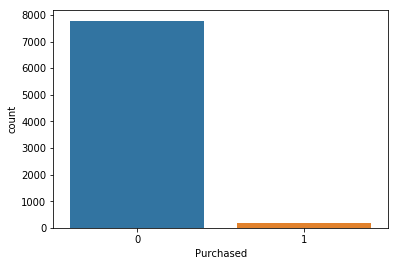

Number of Views:7964
Number of Purchases 181 and percent is 2.272727272727273: 
Number of non Purchases 7783 and percent is 97.72727272727273: 
Analysis for product PC_Kids07_df


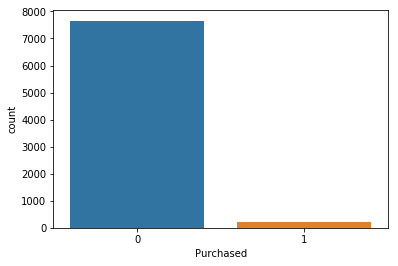

Number of Views:7866
Number of Purchases 210 and percent is 2.6697177726926014: 
Number of non Purchases 7656 and percent is 97.33028222730739: 
Analysis for product PC_Kids05_df


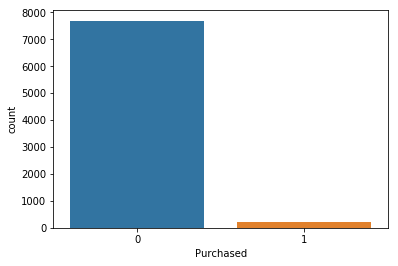

Number of Views:7892
Number of Purchases 202 and percent is 2.5595539787126205: 
Number of non Purchases 7690 and percent is 97.44044602128737: 
Analysis for product PC_Kids06_df


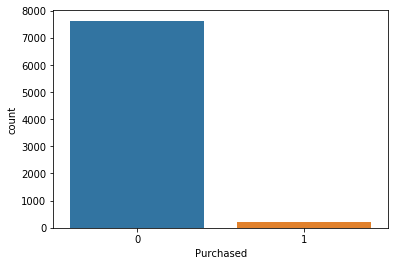

Number of Views:7834
Number of Purchases 208 and percent is 2.655093183558846: 
Number of non Purchases 7626 and percent is 97.34490681644115: 
Analysis for product PC_MobileCameraAccesories06_df


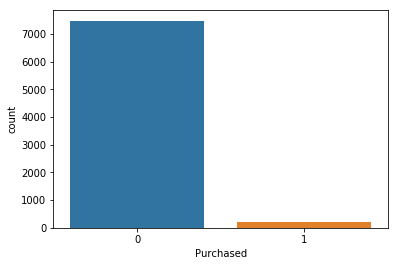

Number of Views:7686
Number of Purchases 200 and percent is 2.602133749674733: 
Number of non Purchases 7486 and percent is 97.39786625032527: 
Analysis for product PC_HomeAppliances05_df


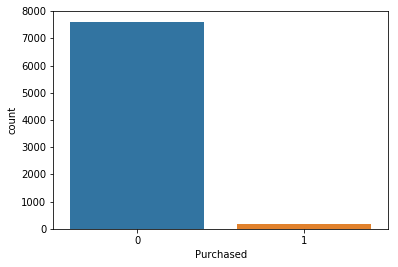

Number of Views:7782
Number of Purchases 169 and percent is 2.1716782318170136: 
Number of non Purchases 7613 and percent is 97.82832176818299: 
Analysis for product PC_HomeAppliances04_df


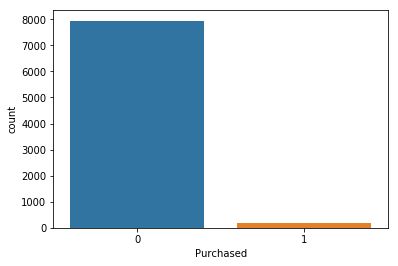

Number of Views:8147
Number of Purchases 201 and percent is 2.467165827912115: 
Number of non Purchases 7946 and percent is 97.53283417208789: 
Analysis for product PC_Kids04_df


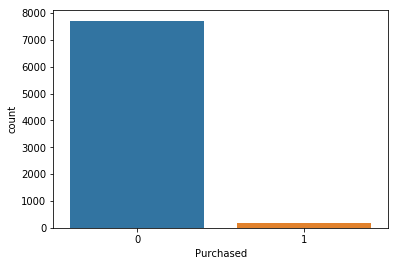

Number of Views:7894
Number of Purchases 180 and percent is 2.2802128198631872: 
Number of non Purchases 7714 and percent is 97.7197871801368: 
Analysis for product PC_Electronics01_df


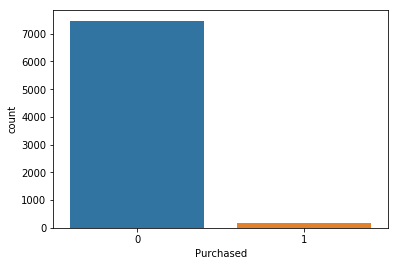

Number of Views:7630
Number of Purchases 161 and percent is 2.1100917431192663: 
Number of non Purchases 7469 and percent is 97.88990825688073: 
Analysis for product PC_Electronics05_df


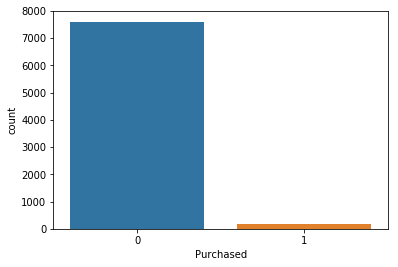

Number of Views:7778
Number of Purchases 176 and percent is 2.262792491643096: 
Number of non Purchases 7602 and percent is 97.7372075083569: 
Analysis for product PC_Electronics07_df


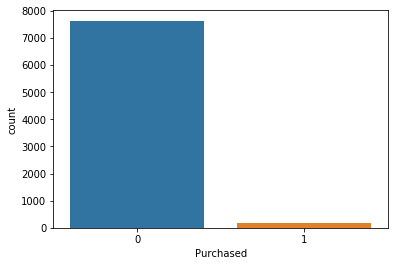

Number of Views:7814
Number of Purchases 180 and percent is 2.3035577169183514: 
Number of non Purchases 7634 and percent is 97.69644228308165: 
Analysis for product PC_HomeAppliances01_df


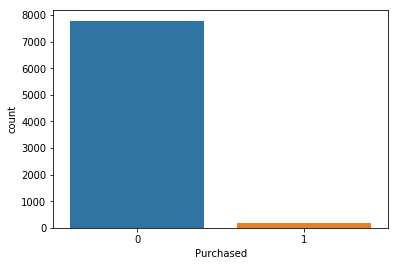

Number of Views:7979
Number of Purchases 195 and percent is 2.44391527760371: 
Number of non Purchases 7784 and percent is 97.55608472239629: 
Analysis for product PC_HomeAppliances02_df


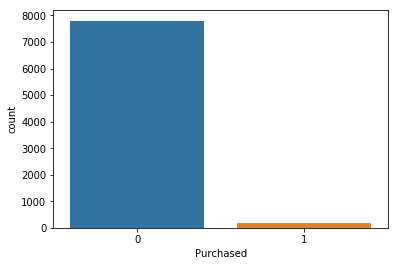

Number of Views:7978
Number of Purchases 177 and percent is 2.2186011531712206: 
Number of non Purchases 7801 and percent is 97.78139884682878: 
Analysis for product PC_HomeAppliances08_df


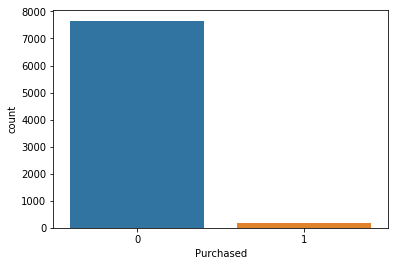

Number of Views:7836
Number of Purchases 180 and percent is 2.2970903522205206: 
Number of non Purchases 7656 and percent is 97.70290964777948: 
Analysis for product PC_HomeAppliances10_df


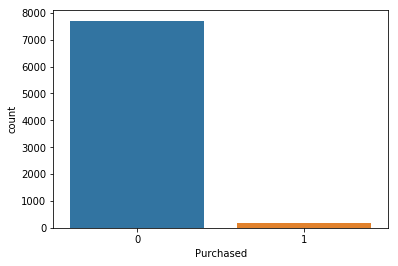

Number of Views:7894
Number of Purchases 185 and percent is 2.3435520648593866: 
Number of non Purchases 7709 and percent is 97.6564479351406: 
Analysis for product PC_HomeAppliances06_df


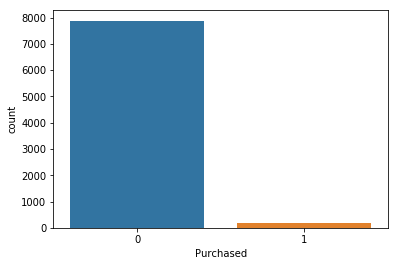

Number of Views:8069
Number of Purchases 189 and percent is 2.342297682488536: 
Number of non Purchases 7880 and percent is 97.65770231751146: 
Analysis for product PC_HomeAppliances03_df


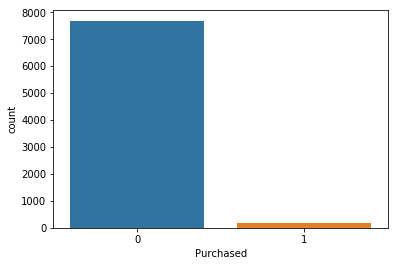

Number of Views:7867
Number of Purchases 182 and percent is 2.3134612940129657: 
Number of non Purchases 7685 and percent is 97.68653870598703: 
Analysis for product PC_HomeAppliances07_df


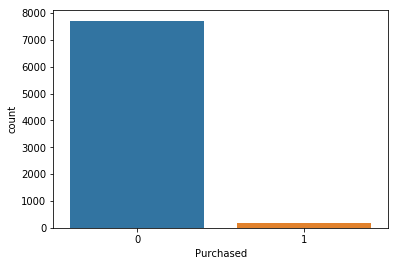

Number of Views:7905
Number of Purchases 194 and percent is 2.4541429475015812: 
Number of non Purchases 7711 and percent is 97.54585705249842: 
Analysis for product PC_HomeAppliances09_df


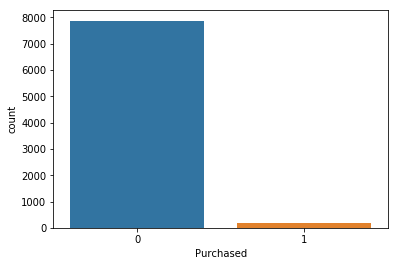

Number of Views:8053
Number of Purchases 179 and percent is 2.222774121445424: 
Number of non Purchases 7874 and percent is 97.77722587855457: 
Analysis for product PC_Kids03_df


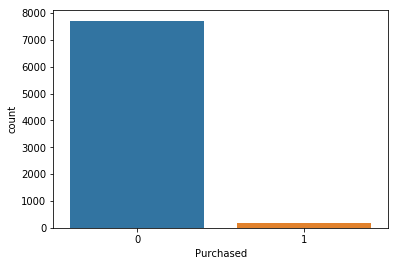

Number of Views:7886
Number of Purchases 174 and percent is 2.206441795587116: 
Number of non Purchases 7712 and percent is 97.79355820441288: 
Analysis for product PC_Furnitures02_df


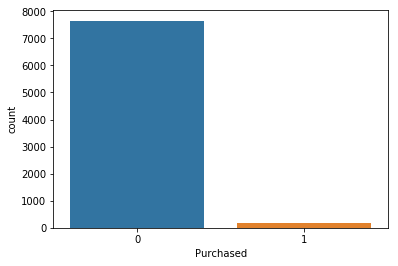

Number of Views:7842
Number of Purchases 193 and percent is 2.4611068604947715: 
Number of non Purchases 7649 and percent is 97.53889313950522: 
Analysis for product PC_Furnitures05_df


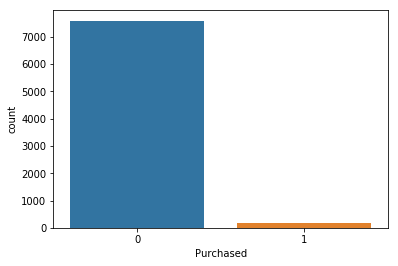

Number of Views:7777
Number of Purchases 185 and percent is 2.378809309502379: 
Number of non Purchases 7592 and percent is 97.62119069049761: 
Analysis for product PC_MobileCameraAccesories05_df


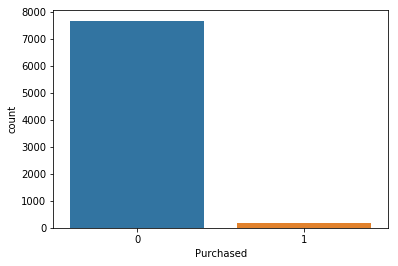

Number of Views:7835
Number of Purchases 166 and percent is 2.11869814932993: 
Number of non Purchases 7669 and percent is 97.88130185067007: 
Analysis for product PC_Kids02_df


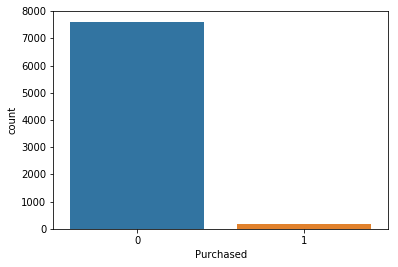

Number of Views:7806
Number of Purchases 193 and percent is 2.4724570842941325: 
Number of non Purchases 7613 and percent is 97.52754291570587: 
Analysis for product PC_Electronics09_df


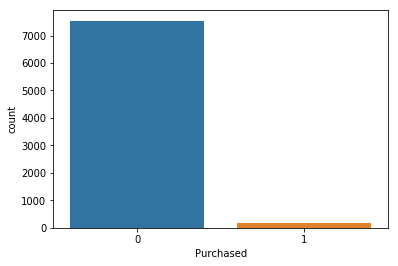

Number of Views:7722
Number of Purchases 182 and percent is 2.356902356902357: 
Number of non Purchases 7540 and percent is 97.64309764309765: 
Analysis for product PC_Electronics04_df


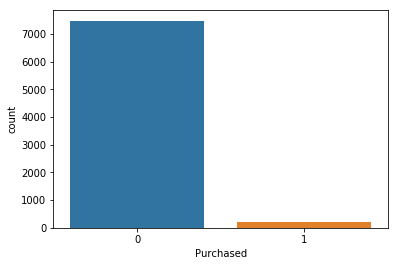

Number of Views:7673
Number of Purchases 195 and percent is 2.541378860940962: 
Number of non Purchases 7478 and percent is 97.45862113905905: 
Analysis for product PC_Electronics06_df


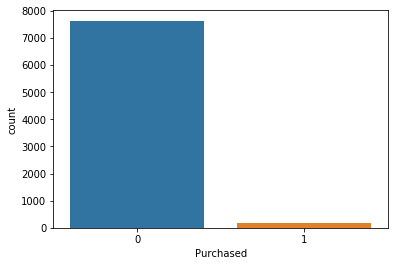

Number of Views:7800
Number of Purchases 168 and percent is 2.1538461538461537: 
Number of non Purchases 7632 and percent is 97.84615384615385: 
Analysis for product PC_Electronics02_df


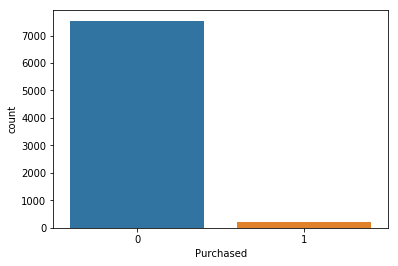

Number of Views:7743
Number of Purchases 203 and percent is 2.6217228464419478: 
Number of non Purchases 7540 and percent is 97.37827715355806: 
Analysis for product PC_Furnitures01_df


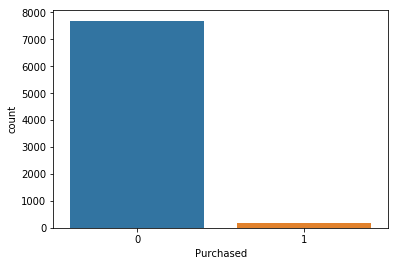

Number of Views:7874
Number of Purchases 181 and percent is 2.298704597409195: 
Number of non Purchases 7693 and percent is 97.7012954025908: 
Analysis for product PC_MobileCameraAccesories10_df


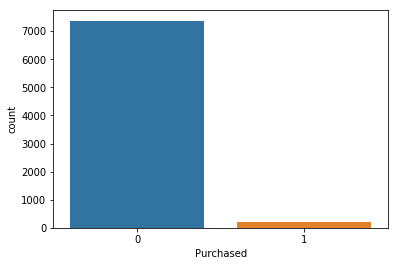

Number of Views:7565
Number of Purchases 194 and percent is 2.5644415069398545: 
Number of non Purchases 7371 and percent is 97.43555849306014: 
Analysis for product PC_MobileCameraAccesories07_df


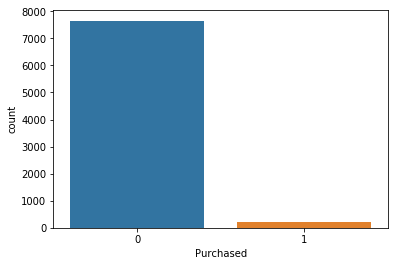

Number of Views:7848
Number of Purchases 196 and percent is 2.4974515800203876: 
Number of non Purchases 7652 and percent is 97.50254841997962: 
Analysis for product PC_Electronics10_df


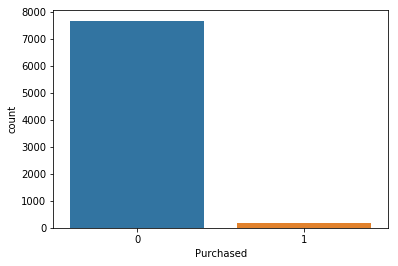

Number of Views:7857
Number of Purchases 178 and percent is 2.2654957362861143: 
Number of non Purchases 7679 and percent is 97.73450426371389: 
Analysis for product PC_Electronics08_df


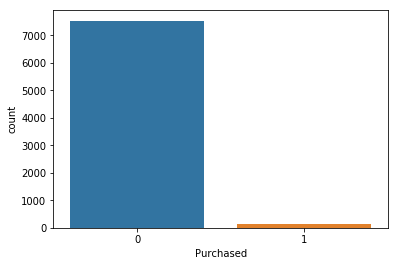

Number of Views:7686
Number of Purchases 153 and percent is 1.9906323185011712: 
Number of non Purchases 7533 and percent is 98.00936768149883: 
Analysis for product PC_Electronics03_df


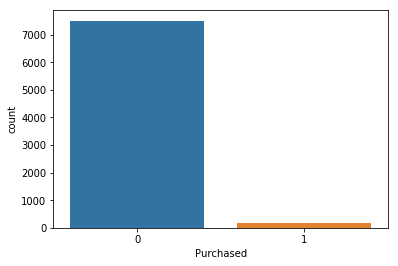

Number of Views:7682
Number of Purchases 176 and percent is 2.2910700338453527: 
Number of non Purchases 7506 and percent is 97.70892996615464: 
Analysis for product PC_MobileCameraAccesories04_df


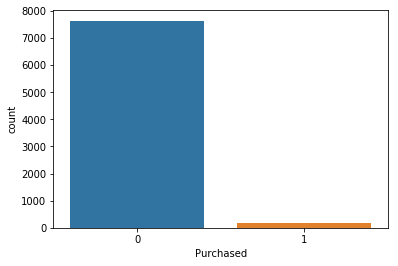

Number of Views:7828
Number of Purchases 192 and percent is 2.452733776188043: 
Number of non Purchases 7636 and percent is 97.54726622381196: 
Analysis for product PC_MobileCameraAccesories08_df


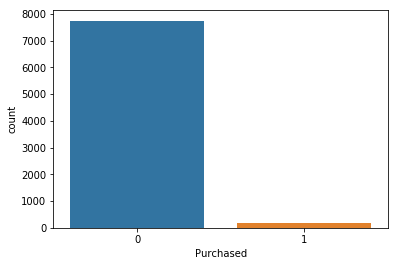

Number of Views:7921
Number of Purchases 176 and percent is 2.221941674031057: 
Number of non Purchases 7745 and percent is 97.77805832596894: 
Analysis for product PC_MobileCameraAccesories09_df


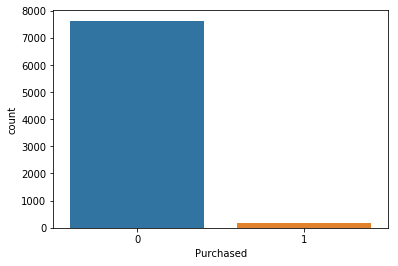

Number of Views:7789
Number of Purchases 165 and percent is 2.1183720631660035: 
Number of non Purchases 7624 and percent is 97.881627936834: 
Analysis for product PC_MobileCameraAccesories02_df


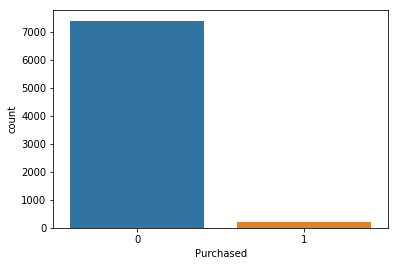

Number of Views:7589
Number of Purchases 192 and percent is 2.529977599156674: 
Number of non Purchases 7397 and percent is 97.47002240084332: 


In [155]:
df= pd.DataFrame()
for a in range(len(frames_index)):
    if(frames_index[a] not in ["PC_Invalid url_df", "PC_admin_df"]):
        df= frameseriespd[a]
        print("Analysis for product {x}".format(x=frames_index[a] ))
        sns.countplot(df["Purchased"], label="Count")   
        plt.show()        
        print("Number of Views:{}".format(df.shape[0]))
        NotPurchased,Purchased = df["Purchased"].value_counts()
        Purper= (Purchased/len(df["Purchased"])*100)
        nonPurper= (NotPurchased/len(df["Purchased"])*100)
        print('Number of Purchases {a} and percent is {b}: '.format(a= Purchased, b= Purper))
        print('Number of non Purchases {a} and percent is {b}: '.format(a= NotPurchased, b=nonPurper))

In [156]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [157]:
def CheckCramers(product_id_df):
    collist= ["SpecialDay","OS", "Browser","Region","TrafficType","VisitorType","Weekend","Purchased"]
    w= len(collist)
    h= len(collist)
    matrix = [[0 for x in range(w)] for y in range(h)]
    for a in range(len(collist)):
        for b in range(len(collist)):
            result= cramers_v(product_id_df[product_id_df.columns[a]], product_id_df[product_id_df.columns[b]])
            matrix[a][b]= result
    cat_var_corr_df=pd.DataFrame(matrix, columns=collist, index=collist)
    print(cat_var_corr_df)

# Check Pearson correlation among continous variables

In [158]:
product_id_df=pd.DataFrame()
for a in range(len(frames_index)):
    if(frames_index[a] not in ["PC_Invalid url_df", "PC_admin_df"]):
        product_id_df= frameseriespd[a]
        con_var_corr_df=product_id_df[["PageDuration","BounceRate","ExitRate","PageValue", "Purchased"]].corr()
        CheckCramers(product_id_df)

             SpecialDay  OS  Browser  Region  TrafficType  VisitorType  \
SpecialDay     1.000000 NaN      NaN     NaN     0.313454     0.309394   
OS                  NaN NaN      NaN     NaN          NaN          NaN   
Browser             NaN NaN      NaN     NaN          NaN          NaN   
Region              NaN NaN      NaN     NaN          NaN          NaN   
TrafficType    0.313454 NaN      NaN     NaN     1.000000     0.253026   
VisitorType    0.309394 NaN      NaN     NaN     0.253026     1.000000   
Weekend        0.386998 NaN      NaN     NaN     0.070101     0.068219   
Purchased      0.348998 NaN      NaN     NaN     0.062911     0.074971   

              Weekend  Purchased  
SpecialDay   0.386998   0.348998  
OS                NaN        NaN  
Browser           NaN        NaN  
Region            NaN        NaN  
TrafficType  0.070101   0.062911  
VisitorType  0.068219   0.074971  
Weekend      1.000000   0.604212  
Purchased    0.604212   1.000000  
             Speci

             SpecialDay  OS  Browser  Region  TrafficType  VisitorType  \
SpecialDay     1.000000 NaN      NaN     NaN     0.293985     0.302163   
OS                  NaN NaN      NaN     NaN          NaN          NaN   
Browser             NaN NaN      NaN     NaN          NaN          NaN   
Region              NaN NaN      NaN     NaN          NaN          NaN   
TrafficType    0.293985 NaN      NaN     NaN     1.000000     0.254964   
VisitorType    0.302163 NaN      NaN     NaN     0.254964     1.000000   
Weekend        0.321429 NaN      NaN     NaN     0.071880     0.062994   
Purchased      0.292444 NaN      NaN     NaN     0.042682     0.072158   

              Weekend  Purchased  
SpecialDay   0.321429   0.292444  
OS                NaN        NaN  
Browser           NaN        NaN  
Region            NaN        NaN  
TrafficType  0.071880   0.042682  
VisitorType  0.062994   0.072158  
Weekend      1.000000   0.502281  
Purchased    0.502281   1.000000  
             Speci

             SpecialDay  OS  Browser  Region  TrafficType  VisitorType  \
SpecialDay     1.000000 NaN      NaN     NaN     0.327276     0.289662   
OS                  NaN NaN      NaN     NaN          NaN          NaN   
Browser             NaN NaN      NaN     NaN          NaN          NaN   
Region              NaN NaN      NaN     NaN          NaN          NaN   
TrafficType    0.327276 NaN      NaN     NaN     1.000000     0.250580   
VisitorType    0.289662 NaN      NaN     NaN     0.250580     1.000000   
Weekend        0.196341 NaN      NaN     NaN     0.033749     0.057961   
Purchased      0.258405 NaN      NaN     NaN     0.049301     0.070857   

              Weekend  Purchased  
SpecialDay   0.196341   0.258405  
OS                NaN        NaN  
Browser           NaN        NaN  
Region            NaN        NaN  
TrafficType  0.033749   0.049301  
VisitorType  0.057961   0.070857  
Weekend      1.000000   0.566589  
Purchased    0.566589   1.000000  
             Speci

             SpecialDay  OS  Browser  Region  TrafficType  VisitorType  \
SpecialDay     1.000000 NaN      NaN     NaN     0.321688     0.287578   
OS                  NaN NaN      NaN     NaN          NaN          NaN   
Browser             NaN NaN      NaN     NaN          NaN          NaN   
Region              NaN NaN      NaN     NaN          NaN          NaN   
TrafficType    0.321688 NaN      NaN     NaN     1.000000     0.249826   
VisitorType    0.287578 NaN      NaN     NaN     0.249826     1.000000   
Weekend        0.347312 NaN      NaN     NaN     0.070363     0.067244   
Purchased      0.342554 NaN      NaN     NaN     0.053598     0.067967   

              Weekend  Purchased  
SpecialDay   0.347312   0.342554  
OS                NaN        NaN  
Browser           NaN        NaN  
Region            NaN        NaN  
TrafficType  0.070363   0.053598  
VisitorType  0.067244   0.067967  
Weekend      1.000000   0.596153  
Purchased    0.596153   1.000000  
             Speci

             SpecialDay  OS  Browser  Region  TrafficType  VisitorType  \
SpecialDay     1.000000 NaN      NaN     NaN     0.270513     0.297657   
OS                  NaN NaN      NaN     NaN          NaN          NaN   
Browser             NaN NaN      NaN     NaN          NaN          NaN   
Region              NaN NaN      NaN     NaN          NaN          NaN   
TrafficType    0.270513 NaN      NaN     NaN     1.000000     0.253115   
VisitorType    0.297657 NaN      NaN     NaN     0.253115     1.000000   
Weekend        0.294030 NaN      NaN     NaN     0.064340     0.077613   
Purchased      0.307227 NaN      NaN     NaN     0.056909     0.082864   

              Weekend  Purchased  
SpecialDay   0.294030   0.307227  
OS                NaN        NaN  
Browser           NaN        NaN  
Region            NaN        NaN  
TrafficType  0.064340   0.056909  
VisitorType  0.077613   0.082864  
Weekend      1.000000   0.509889  
Purchased    0.509889   1.000000  
             Speci

             SpecialDay  OS  Browser  Region  TrafficType  VisitorType  \
SpecialDay     1.000000 NaN      NaN     NaN     0.286933     0.300849   
OS                  NaN NaN      NaN     NaN          NaN          NaN   
Browser             NaN NaN      NaN     NaN          NaN          NaN   
Region              NaN NaN      NaN     NaN          NaN          NaN   
TrafficType    0.286933 NaN      NaN     NaN     1.000000     0.257861   
VisitorType    0.300849 NaN      NaN     NaN     0.257861     1.000000   
Weekend        0.263283 NaN      NaN     NaN     0.069115     0.071565   
Purchased      0.283904 NaN      NaN     NaN     0.037124     0.084522   

              Weekend  Purchased  
SpecialDay   0.263283   0.283904  
OS                NaN        NaN  
Browser           NaN        NaN  
Region            NaN        NaN  
TrafficType  0.069115   0.037124  
VisitorType  0.071565   0.084522  
Weekend      1.000000   0.537494  
Purchased    0.537494   1.000000  
             Speci

There is positive correlation between Exit rate and Bounce rate of 0.79. There seems to be no other correlation between variables. 

# Predicting for entire dataset

# K FOLD

In [159]:
def predictByKFold(X_train, X_test, y_train, y_test):
    x=X_train.append(X_test)
    y=y_train.append(y_test)
    seed = 7
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    model = LogisticRegression()
    predictions= model_selection.cross_val_predict(model, x,y, cv=kfold )
    acc= metrics.accuracy_score(y, predictions)
    acc=round(acc, 4)
    return acc, ""

# Logistic regression

In [160]:
def predictByLogistic(X_train, X_test, y_train, y_test):
    #print("called predictByLogistic")
    logmodel = LogisticRegression()
    model = logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    acc=accuracy_score(predictions, y_test)
    con=confusion_matrix(y_test,predictions)
    #print( accuracy_score(predictions, y_test) )
    #return confusion_matrix(y_test,predictions)
    #print("success predictByLogistic")
    acc=round(acc, 4)
    return acc, con

# Random Forest

In [161]:
def predictByRandomForestClassifier(X_train, X_test, y_train, y_test):
    #print("called predictByRandomForestClassifier")
    rfmodel= RandomForestClassifier()
    rfmodel.fit(X_train, y_train)
    predictions = rfmodel.predict(X_test)
    sco=rfmodel.score(X_test,y_test)
    con=confusion_matrix(y_test, predictions)
    sco=round(sco, 4)
    #print("success predictByRandomForestClassifier")
    return sco, con

# K Nearest Neighbours

In [162]:
def predictByKNearestNeighbours(X_train, X_test, y_train, y_test):
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = KNeighborsClassifier()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    sco=model.score(X_test, y_test)
    con=confusion_matrix(y_test, predictions)
    sco=round(sco, 4)
    return sco, con
    

# Gaussian

In [163]:
def preditByGaussian(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    sco=model.score(X_test, y_test)
    con=confusion_matrix(y_test, predicted)
    sco=round(sco, 4)
    return sco, con   

# SVM

In [164]:
def predictBySVC(X_train, X_test, y_train, y_test):
    #print("called predictBySVC")
    #svcmodel = SVC(kernel='linear',class_weight='balanced', probability=True)
    svcmodel = SVC(kernel='linear',C=1.0)
    svcmodel.fit(X_train, y_train)
    predictions = svcmodel.predict(X_test)
    sco=svcmodel.score(X_test,y_test)
    con=confusion_matrix(y_test, predictions)
    #print("called predictBySVC")
    sco=round(sco, 4)
    return sco, con
    #print( np.unique( predictions ) )
    #print( accuracy_score(y_test, predictions) )

# Bagging

In [165]:
def predictByBaggingClassifier(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeClassifier(criterion = 'entropy' )
    model = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    sco=model.score(X_test, y_test)
    con=confusion_matrix(y_test, predicted)
    sco=round(sco, 4)
    return sco, con

# Adaboosting

In [166]:
def predictByAdaboostingClassifier(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeClassifier(criterion = 'entropy' )
    model = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    sco=model.score(X_test, y_test)
    con=confusion_matrix(y_test, predicted)
    sco=round(sco, 4)
    return sco, con

# GradientDesentBoosting

In [167]:
def predictByGradientDesentBoostingClassifier(X_train, X_test, y_train, y_test):
    model = 
    (n_estimators = 50)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    sco=model.score(X_test, y_test)
    con=confusion_matrix(y_test, predicted)
    sco=round(sco, 4)
    return sco, con

# Downsample

In [168]:
def doDownsample(frame):
    df_unpurchase_maj= frame[frame.Purchased==0]    
    df_purchase_min= frame[frame.Purchased==1]
    df_unpurchase_maj_downsampled= df_unpurchase_maj.sample(df_purchase_min.Purchased.count())
    #df_purchase_min_upsampled = resample(df_purchase_min, 
                                 #replace=True,     # sample with replacement
                                 #n_samples=df_unpurchase_maj.shape[0],    # to match majority class
                                 #random_state=123)
    df_downSampled = pd.concat([df_purchase_min, df_unpurchase_maj_downsampled])
    return df_downSampled
    #print(df_upsampled.Purchased.value_counts())

# Custom Sample

In [169]:
def customSample(frame):
    df_unpurchase= frame[frame.Purchased==0]    
    df_purchase= frame[frame.Purchased==1]
    x,y=train_test_split(df_unpurchase, test_size=0.30,random_state=101)
    a,b=train_test_split(df_purchase, test_size=0.30,random_state=101)
    trainsample=pd.concat([a,x])
    testsample=pd.concat([y,b])
    return trainsample, testsample
    #print(sample.shape)

# EXECUTE

In [170]:
operations=["Simple", "doDownsample","customSample"]
#algorithms=["SVM"]
algorithms=["K fold","Logistic","RandomForestClassifier", "KNN","NBGaussian","Bagging","Adaboosting","GradientDesentBoosting"]

In [171]:
product_predict_df=pd.DataFrame()
output=[]
productslist=[]
pro_Frames=pd.Series(index=frameseriespd)
#algorithms=["Logistic","SVM","RandomForestClassifier"]
for a in range(len(frames_index)):
    if(frames_index[a] not in ["PC_Invalid url_df", "PC_admin_df"]):
        product_predict_df= frameseriespd[a]
        print(frames_index[a])
        w=len(operations)
        h=len(algorithms)
        matrix = [[0 for x in range(w)] for y in range(h)]
        for a in range(len(operations)):
            method= operations[a]
            #print(method)
            if(method=="Simple"):
                product_predict_df=product_predict_df
            elif(method=="doDownsample"):
                product_predict_df= doDownsample(product_predict_df)
            elif(method=="customSample"):
                train, test = customSample(product_predict_df)
                
            if(method!="customSample") :
                X_train, X_test, y_train, y_test = train_test_split(product_predict_df.drop(['Purchased','productCode','Month'],axis=1), 
                                                    product_predict_df['Purchased'], test_size=0.30, 
                                                    random_state=101)
            else:
                X_train= train.drop(['Purchased','productCode','Month'],axis=1)
                X_test=test.drop(['Purchased','productCode','Month'],axis=1)
                y_train=train['Purchased']
                y_test=test['Purchased']
            
            for b in range(len(algorithms)):
                
                algType=algorithms[b]
                #print(algType)
                if(algType=="Logistic"):
                    result= predictByLogistic(X_train, X_test, y_train, y_test)
                   
                elif(algType=="K fold"):
                    result= predictByKFold(X_train, X_test, y_train, y_test)
                    
                elif(algType=="KNN"):
                    result= predictByKNearestNeighbours(X_train, X_test, y_train, y_test)
                    
                elif(algType=="NBGaussian"):   
                    result=preditByGaussian(X_train, X_test, y_train, y_test)
                    
                elif(algType=="SVM"):
                    result= predictBySVC(X_train, X_test, y_train, y_test)
                    
                elif(algType=="RandomForestClassifier"):
                    result= predictByRandomForestClassifier(X_train, X_test, y_train, y_test)
                    
                elif(algType=="Bagging"):
                    result= predictByBaggingClassifier(X_train, X_test, y_train, y_test)
                    
                elif(algType=="Adaboosting"):
                    result= predictByAdaboostingClassifier(X_train, X_test, y_train, y_test)
                    
                elif(algType=="GradientDesentBoosting"):
                    result= predictByGradientDesentBoostingClassifier(X_train, X_test, y_train, y_test)
                    
                matrix[b][a]= result
                
            final_df=pd.DataFrame(matrix, columns=operations, index=algorithms) 
        
    print(final_df)
                 

PC_Furnitures03_df
                                                 Simple  \
K fold                                       (0.9766, )   
Logistic                  (0.973, [[2268, 0], [63, 0]])   
RandomForestClassifier  (0.9661, [[2252, 16], [63, 0]])   
KNN                       (0.973, [[2268, 0], [63, 0]])   
NBGaussian                (0.973, [[2268, 0], [63, 0]])   
Bagging                 (0.9674, [[2255, 13], [63, 0]])   
Adaboosting             (0.9635, [[2246, 22], [63, 0]])   
GradientDesentBoosting   (0.9704, [[2262, 6], [63, 0]])   

                                          doDownsample  \
K fold                                      (0.5934, )   
Logistic                (0.5909, [[33, 23], [22, 32]])   
RandomForestClassifier  (0.5455, [[32, 24], [26, 28]])   
KNN                     (0.5455, [[32, 24], [26, 28]])   
NBGaussian              (0.5091, [[13, 43], [11, 43]])   
Bagging                 (0.5909, [[29, 27], [18, 36]])   
Adaboosting             (0.5636, [[28, 28],

                                                 Simple  \
K fold                                       (0.9747, )   
Logistic                 (0.9778, [[2332, 0], [53, 0]])   
RandomForestClassifier  (0.9727, [[2318, 14], [51, 2]])   
KNN                      (0.9778, [[2332, 0], [53, 0]])   
NBGaussian              (0.9644, [[2299, 33], [52, 1]])   
Bagging                 (0.9727, [[2319, 13], [52, 1]])   
Adaboosting             (0.9648, [[2300, 32], [52, 1]])   
GradientDesentBoosting   (0.9761, [[2328, 4], [53, 0]])   

                                          doDownsample  \
K fold                                      (0.5274, )   
Logistic                (0.5537, [[23, 34], [20, 44]])   
RandomForestClassifier  (0.5537, [[40, 17], [37, 27]])   
KNN                      (0.438, [[19, 38], [30, 34]])   
NBGaussian              (0.5868, [[19, 38], [12, 52]])   
Bagging                 (0.5785, [[38, 19], [32, 32]])   
Adaboosting              (0.595, [[37, 20], [29, 35]])   
Grad

                                                 Simple  \
K fold                                       (0.9773, )   
Logistic                 (0.9732, [[2326, 0], [64, 0]])   
RandomForestClassifier  (0.9674, [[2310, 16], [62, 2]])   
KNN                      (0.9732, [[2326, 0], [64, 0]])   
NBGaussian               (0.9732, [[2326, 0], [64, 0]])   
Bagging                 (0.9674, [[2310, 16], [62, 2]])   
Adaboosting             (0.9632, [[2300, 26], [62, 2]])   
GradientDesentBoosting  (0.9686, [[2314, 12], [63, 1]])   

                                          doDownsample  \
K fold                                      (0.5193, )   
Logistic                (0.5505, [[25, 36], [13, 35]])   
RandomForestClassifier  (0.5596, [[37, 24], [24, 24]])   
KNN                     (0.5046, [[24, 37], [17, 31]])   
NBGaussian              (0.5505, [[37, 24], [25, 23]])   
Bagging                 (0.5229, [[29, 32], [20, 28]])   
Adaboosting             (0.5229, [[29, 32], [20, 28]])   
Grad

                                                 Simple  \
K fold                                       (0.9783, )   
Logistic                 (0.9786, [[2285, 0], [50, 0]])   
RandomForestClassifier  (0.9713, [[2268, 17], [50, 0]])   
KNN                      (0.9786, [[2285, 0], [50, 0]])   
NBGaussian              (0.9657, [[2254, 31], [49, 1]])   
Bagging                 (0.9726, [[2271, 14], [50, 0]])   
Adaboosting             (0.9555, [[2231, 54], [50, 0]])   
GradientDesentBoosting   (0.9769, [[2281, 4], [50, 0]])   

                                          doDownsample  \
K fold                                      (0.5947, )   
Logistic                 (0.598, [[31, 21], [20, 30]])   
RandomForestClassifier  (0.5784, [[31, 21], [22, 28]])   
KNN                     (0.5098, [[37, 15], [35, 15]])   
NBGaussian              (0.5882, [[29, 23], [19, 31]])   
Bagging                 (0.5882, [[30, 22], [20, 30]])   
Adaboosting                (0.5, [[21, 31], [20, 30]])   
Grad

                                                 Simple  \
K fold                                       (0.9754, )   
Logistic                 (0.9783, [[2342, 0], [52, 0]])   
RandomForestClassifier  (0.9716, [[2324, 18], [50, 2]])   
KNN                      (0.9779, [[2341, 1], [52, 0]])   
NBGaussian               (0.9754, [[2334, 8], [51, 1]])   
Bagging                 (0.9712, [[2324, 18], [51, 1]])   
Adaboosting             (0.9678, [[2315, 27], [50, 2]])   
GradientDesentBoosting   (0.9783, [[2342, 0], [52, 0]])   

                                          doDownsample  \
K fold                                      (0.5641, )   
Logistic                (0.5726, [[43, 12], [38, 24]])   
RandomForestClassifier  (0.5641, [[35, 20], [31, 31]])   
KNN                     (0.5128, [[20, 35], [22, 40]])   
NBGaussian              (0.6068, [[42, 13], [33, 29]])   
Bagging                 (0.5641, [[31, 24], [27, 35]])   
Adaboosting             (0.5641, [[32, 23], [28, 34]])   
Grad

                                                 Simple  \
K fold                                       (0.9755, )   
Logistic                 (0.9734, [[2309, 0], [63, 0]])   
RandomForestClassifier  (0.9667, [[2293, 16], [63, 0]])   
KNN                      (0.9734, [[2309, 0], [63, 0]])   
NBGaussian               (0.9734, [[2309, 0], [63, 0]])   
Bagging                  (0.9696, [[2300, 9], [63, 0]])   
Adaboosting             (0.9646, [[2287, 22], [62, 1]])   
GradientDesentBoosting   (0.9726, [[2307, 2], [63, 0]])   

                                          doDownsample  \
K fold                                      (0.5155, )   
Logistic                (0.4786, [[30, 27], [34, 26]])   
RandomForestClassifier   (0.547, [[37, 20], [33, 27]])   
KNN                     (0.5214, [[28, 29], [27, 33]])   
NBGaussian              (0.5726, [[20, 37], [13, 47]])   
Bagging                 (0.5812, [[36, 21], [28, 32]])   
Adaboosting             (0.5641, [[34, 23], [28, 32]])   
Grad

                                                 Simple  \
K fold                                       (0.9753, )   
Logistic                 (0.9731, [[2279, 0], [63, 0]])   
RandomForestClassifier  (0.9671, [[2262, 17], [60, 3]])   
KNN                      (0.9731, [[2279, 0], [63, 0]])   
NBGaussian               (0.9731, [[2279, 0], [63, 0]])   
Bagging                  (0.9701, [[2271, 8], [62, 1]])   
Adaboosting             (0.9624, [[2253, 26], [62, 1]])   
GradientDesentBoosting   (0.9727, [[2277, 2], [62, 1]])   

                                          doDownsample  \
K fold                                      (0.5855, )   
Logistic                (0.5172, [[25, 32], [24, 35]])   
RandomForestClassifier     (0.5, [[32, 25], [33, 26]])   
KNN                     (0.4828, [[42, 15], [45, 14]])   
NBGaussian              (0.5086, [[16, 41], [16, 43]])   
Bagging                 (0.5603, [[35, 22], [29, 30]])   
Adaboosting             (0.4569, [[30, 27], [36, 23]])   
Grad

                                                 Simple  \
K fold                                       (0.9744, )   
Logistic                 (0.9767, [[2217, 0], [53, 0]])   
RandomForestClassifier  (0.9678, [[2196, 21], [52, 1]])   
KNN                      (0.9767, [[2217, 0], [53, 0]])   
NBGaussian              (0.9564, [[2169, 48], [51, 2]])   
Bagging                 (0.9727, [[2207, 10], [52, 1]])   
Adaboosting             (0.9626, [[2184, 33], [52, 1]])   
GradientDesentBoosting   (0.9762, [[2216, 1], [53, 0]])   

                                          doDownsample  \
K fold                                      (0.5232, )   
Logistic                (0.5556, [[37, 20], [32, 28]])   
RandomForestClassifier  (0.4701, [[37, 20], [42, 18]])   
KNN                     (0.4872, [[28, 29], [31, 29]])   
NBGaussian              (0.4615, [[30, 27], [36, 24]])   
Bagging                 (0.4701, [[35, 22], [40, 20]])   
Adaboosting             (0.4615, [[35, 22], [41, 19]])   
Grad

                                                 Simple  \
K fold                                       (0.9778, )   
Logistic                 (0.9785, [[2326, 0], [51, 0]])   
RandomForestClassifier  (0.9697, [[2304, 22], [50, 1]])   
KNN                      (0.9785, [[2326, 0], [51, 0]])   
NBGaussian               (0.971, [[2306, 20], [49, 2]])   
Bagging                 (0.9731, [[2312, 14], [50, 1]])   
Adaboosting             (0.9642, [[2290, 36], [49, 2]])   
GradientDesentBoosting   (0.9752, [[2318, 8], [51, 0]])   

                                          doDownsample  \
K fold                                      (0.4858, )   
Logistic                (0.5566, [[28, 29], [18, 31]])   
RandomForestClassifier  (0.5566, [[32, 25], [22, 27]])   
KNN                     (0.4717, [[30, 27], [29, 20]])   
NBGaussian              (0.5849, [[26, 31], [13, 36]])   
Bagging                 (0.5849, [[30, 27], [17, 32]])   
Adaboosting             (0.5566, [[29, 28], [19, 30]])   
Grad